# PYTHON COURSE FOR SCIENTIFIC PROGRAMMING 
**Main Editor of this Lecture:**

Xabier Oianguren Asua: oiangu9@gmail.com

**The lecture is based on previous material prepared by:**

Jan Scarabelli Calopa: Jan.Scarabelli@e-campus.uab.cat 

---

# LECTURE V : File manipulation

### $(1.)$ - [*FILE HANDLING*](#1)
### $(2.)$ - [*MANIPULATE DIRECTORY STRUCTURES*](#2)
### $(3.)$ - [*MANAGE NUMPY DATA*](#3)
### $(4.)$ - [*ADDITIONAL FILE TYPES*](#4)

### [FURTHER TOPICS NOT COVERED IN THE COURSE](#5)

---
---

<a id='1'></a>
## $(1.)$ File Handing


Despite each OS has its own system to create and access files, Python has its own file manipulation system that uses a common interface known as a "file handle".

### (a) Open


The key function for working with files in Python is the `open()` function. It takes two parameters: `filename`, and `mode`.

There are four different methods (modes) for opening a file:

| Indicator (naive/extra) | Open a file to... | Opening mode + | Pointer Position |
| --- | --- | --- | --- |
| r/r+ | Read it. | +writing | Beginning |
| w/w+ | Write on it. It **overwrites** the file if it already existed. Creates a new file otherwise | +reading | Beginning |
| x/x+ | Write on it. `FileExistsError` raised and execution will stop if it already existed (safe mode). Creates a new file otherwise | +reading | Beginning | 
| a/a+ | Write at the end of an already existing file if it exists. Creates a new file otherwise. | +reading | End

(In general, it is my advice to use the "no +" modes of operation, to avoid confusions.)

Let's see an example. We want to open a file called `"File.txt"` in `"w"` mode. That is, we want to create a new file with that name or just overrite any file with such a name with the objective of writting data to it.

In [1]:
nameHandle = open("File.txt","w")

where:
- `nameHandle` stands for the name we have invented to handle this file. That is, it will be our "access" to the file. If we want to write data to this file we will tell this object to do so.
- `open()` is the function to open a file, as we have already said.
- `"File.txt"` is the name (string) of the file we want to open.
- `"w"` indicates we want to write on this file (in an overwritting way).

##### Note on Encodings
As a side note, remember that everything in the end (in the memeory of the computer) is saved and manipulated in bits (0-s and 1-s), this means that in reality in the memory of the computer there is nowhere a letter `a`. Instead if for example we want to encode the 27 characters of the alphabet, we could give each letter a unique tag using sequences of 5 bits (there are 32 possible sequences since $2^5=32$). If so, we could say `a` will be the sequence $00000$, `b` will be $00001$, `c` will be $00010$ etc. Such that in memory we will save the text `acb` as $000000001000001$. Then when we want to read it again, we will need to specify in which encoding the text is codified to be able to convert it back to characters.

One of the first encoding standards for text was the so called ASCII standard based on the alphabet and symbols for English, which used 7 bits to encode about 127 different symbols or characters, among them the alphabetic characters, the numerical digits, symbols like `?` or `!` and some other special characters like `\n` representing line breaks, or the EOF representing the end of a text file, among others.

Today there are several standardized encodings, and each operative system (OS) has its preferred ones. ASCII was the main encoding used in Internet until December 2007, when it was surpassed by UTF-8 using 8 bits (and thus allowing double symbols to be coded).

In the function `open()`, we can also add a thrid argument indicating the **encoding** for the characters we will deal with in this file. If we do not specify it, Python will just use the default encoding on the OS. But in general, we could specify any of the encodings listed in the following table of the official Python documentation:

[https://docs.python.org/3/library/codecs.html#standard-encodings](https://docs.python.org/3/library/codecs.html#standard-encodings)

for example we could write `'utf_8'` or `'ascii'` as a third argument, say:

`open("File.txt", "w", "utf_8") `


### (b) Write and Close

The file handle we have created (the variable we decided to call `fileHandle`) is in reality an object with a pointer to a specific position of the text file. You can imagine it as the **cursor** that appears when you are writting something on a computer, just that this time you cannont see where the cursor is (it is this what we called "Pointer position" in the first table of the lecture).

Now, this file handle is like a variable, but which not only contains information, it also has associated functions that allow the user to do multiple things to the file pointed by the handle (it is a class instance, as we will comment in the end of the lecture). One of these functions is `.write()`. The string we pass to it as an argument will be written to the file in the last position we have added something (in the position of the cursor). That is, we can call to it multiple times and the added text will be sequential in the file.

After manipulating the file, we **must** call to the `.close()` function! It is then when the text is really written to the file. Until then, there might be parts of the text we have sent using `.write()` that were left floating in a limbo (called a text **buffer**).

Let's see an example.

In [2]:
fileHandle = open("File.txt","w") #Creation of the file
fileHandle.write("Hi!\nWelcome to the python course.\n")
fileHandle.write("Enjoy!\n")
fileHandle.close()

If you now open the file "File.txt" that has been created in the directory where the Jupyter Notebook is, you will see that it contains the follwoing text:
```
Hi!
Welcome to the python course.
Enjoy

```

You may have noticed the strange character `\n` we introcuced in the writting function as part of the string. The character `\` is an escapement character, meaning that the following character must be treated in a speacial way. In this case, for example, the string `\n` indicates the beginning of a new line. Another example is `\t` which will be interpreted as a TAB space.

Or for example, imagine we would like to write a double or single quote `"` or `'` to the file. How could we do this? Since they are the string delimiters in Python we will find it to be impossible. Try it. For this, we have the special characters `\"` and `\'` respectively!

Once again, after having edited the file, we want to save the changes to let other programmes access its contents. To do so, we must use the `.close()` function.


#### Notes on Relative and Absolute Paths
As we said, the result of this operation will be the creation of the file in the same directory (**directory==folder**) as the Jupyter Notebook is saved. But, is it possible to create files in other locations? Absolutely! 

For that instead of just introducing the name of the file in `open()` as `"File.txt"` we will need to introduce the details of the **path** to the directory we want it to be saved. The path is the location of a file or directory in the tree of directories of the persistent memory of the computer. We can provide it in two ways. A **relative path** is a path given from the point the Python interpreter is being executed and on (in our case, from the directory of the Jupyter Notebook and down there). For instance, imagine you have the following tree of directories under the folder where this Jupyter Notebook called `Lecture_05.ipynb` is:

Then, if we want to save the text in the folder "Save_the_text_here_Folder" under the folder "Folder_1" which is insider the "Python_Course" folder where this notebook is, you will do:

`open("Folder_1/Save_the_texts_here_Folder/File.txt", "w")`

This path `"Folder_1/Save_the_texts_here_Folder/File.txt"` is a so called **relative path**.

If instead you want to save things anywhere in the directory structure, we will need to write the full path from the beginning of the tree of folders, for example something like `"/home/xabier/Documents/UAB/My_texts/File.txt"`. This is called an **absolute path**, since there is no doubt where I am trying to save it. That is, even if I move the Jupyter Notebook to other places in memory, the text file will always be created in the same place! 

Ofcourse, this will work if those folders like `"Folder_1"` or `"Documents"` etc. already exist! Make sure they do. We will see in a moment how to create new directories using Python.

##### Important note for Windows vs Linux/MacOS users
In Linux and MacOS, the directory structure always starts in a `"/"` and the next subfolders are indicated with a bar `"/"`, like `"/home/navau/Documents/UAB/My_texts/File.txt"`. However, in Windows directory trees always start in the drive in which data is saved, typically `"C:\` and the separation between subdirectories is specified with an inverse bar `"\"`. For example `"C:\Users\navau\Documents\UAB\My_texts\File.txt"`.

##### Comment on File names
If you really are into jumping from the naive user-side to a more advanced-computer user-side, you should **end** today **naming files** with **spaces** and strange characters! This is because many interpreters (not the case of Python, but you will save problems in the future) interpret the space as a finish mark and will stop reading the name of the file at that point. That is, avoid naming files as `"¡My first text file is sugoi!.txt"` and instead name it `"My_first_text_file_is_sugoi.txt"` or something of the like.

##### Comment on Buffers
In reality, when you tell the file handle `.write("this or that")`, the text is not immediately saved in the text file in the memory of the computer. This is because these tasks are managed by the operative system, and if we keep interrupting its activity constantly by telling it to write little messages to memory the task could get very inefficient. Instead, the text is first accumulated in a temporary so called **buffer** by Python (in the RAM), until this text buffer is full and then the whole chunk of information to be saved is given as a whole to the operating system, who will now take care to write the text as soon as possible to disk. Note that in fact, the operating system will take that text and actually save it in yet another buffer, until it finds the moment to save stuff to disk. When you call `.close()` not only the file stops to be opened by python and lets other programs open it safely, but all the buffers are flushed and you can be sure the text is now really saved in disk. 

Of course, it could happen that if the computer suddenly shuts down while `close` has still not been called, the data written with `write` is lost forever (because it was still on an intermediate buffer). To avoid it and explicitly force python to send the buffer as it is to the operative system, you can use `filehandle.flush()`. In addition, you could actually force the operative system to write to disk using `os.fsync()`, a function from the `os` library, which you can import with `import os`. Yet, normally you need not force the operative system to do so, it is fast enough for general use-cases.

### (c) Read

As we had the function `.write()` we also have the instruction `.read()`, which if the file is opened in read mode `r`, allows us to read the content of a file (remember the encoding argument in case the read text looks non-sense). 

Calling `.read()` will output a string which will be the text of the file. We can save it to a variable for further processing, or just display it with `print()`.

Let's see the following example

In [3]:
fileHandle = open("File.txt","r") #read only
print(fileHandle.read())
fileHandle.close()

Hi!
Welcome to the python course.
Enjoy!



Yes, even when reading it is convenient to use the `.close()` function when we are done, even if in this case, it is usually safe to have multiple readers reading the same file.

Note that if the text file was very big (like tens of gigabytes, it is not the most typical thing however), reading the whole file at once could be problematic. Instead, the `.read()` function accepts an integer argument indicating the number of characters we want to read from the file:

In [4]:
fileHandle = open("File.txt","r") #read only
print(fileHandle.read(5))
fileHandle.close()

Hi!
W


Note the `\n` for the line jump is a character as well!

Then, if we asked another 5 characters before closing the file, we would receive the following 5. This is because the **cursor** of this particular handle will have moved on 5 positions.

In [5]:
fileHandle = open("File.txt","r") #read only
print(fileHandle.read(5))
print("well well")
print(fileHandle.read(5))
fileHandle.close()

Hi!
W
well well
elcom


Don't forget you could save the read string to a variable!

In [6]:
fileHandle = open("File.txt","r") #read only
text = fileHandle.read(5)

text = text + fileHandle.read(5)
print(text)
fileHandle.close()

Hi!
Welcom


Now, we can iterate over a file as well. A file will be interpreted as a list of strings where each element is a line of the file (where lines are defined as the different fragments separated by `\n`-s).

Consequently, we can use a `for()` loop to iterate over the lines of the file:

In [7]:
fileHandle = open("File.txt","r")

for line in fileHandle:
    print(line)
    
fileHandle.close()

Hi!

Welcome to the python course.

Enjoy!



Notice the blank line between lines. This is because each of the `line`-s in each iteration is a string with the line of the text with a `\n` at the end of the string, so when we print the line an extra new-line is printed, because the `print()` statement generates a new line by default (this is the reason why you needed extra consideration in the star printing exercise in lecture 2).

As each `line` is a string, it is possible to avoid the `'\n'` by not taking the last character of the string.

In [8]:
fileHandle = open("File.txt","r")
for line in fileHandle:
    print(line[:-1])
fileHandle.close()

Hi!
Welcome to the python course.
Enjoy!


In [9]:
fileHandle = open("File.txt","r")
for line in fileHandle:
    line = line[:-1] + 'xDD'
    print(line)
fileHandle.close()

Hi!xDD
Welcome to the python course.xDD
Enjoy!xDD


#### Readline

The `.readline()` function allows us to read just one line, without the need of iterations. Which line will be read will depend on the cursor's current position.

In [10]:
fileHandle = open("File.txt","r")
one = fileHandle.read(5)
two = fileHandle.readline()
three = fileHandle.readline()
print(f"{one} \n {two} \n {three}")
fileHandle.close()

Hi!
W 
 elcome to the python course.
 
 Enjoy!



#### Readlines

This functions returns a list of strings containing all the lines of the file in order:

In [11]:
fileHandle = open("File.txt","r")
list_of_lines = fileHandle.readlines()
fileHandle.close()

print(list_of_lines)

['Hi!\n', 'Welcome to the python course.\n', 'Enjoy!\n']


If we wanted to print only a specific line in the file, let's say the second line, we could use the following instruction.

In [12]:
fileHandle = open("File.txt","r")
second_line = fileHandle.readlines()[1]
fileHandle.close()
print(second_line)

Welcome to the python course.



### (d) Append

Each time an existing file is opened with "w" mode, its content is **completely** overwritten and the `.write()` method will start writting from the beginning. To avoid it, we can use the append mode `"a"`. When we call `.write()` in this mode, the text will be written after the last line of the file, without overwritting anything.

As an example, we are going to modify the file using `"w"`, an then we are going to add another line without deleting anything. 

In [13]:
print("Result in writting mode:")
#Overwrite file
fileHandle = open("File.txt","w") 
fileHandle.write("Everything has been erased!\n")
fileHandle.close()
#Print result of "w"
fileHandle = open("File.txt","r")
print(fileHandle.read())
fileHandle.close()

print("Result with append mode:")
#Use of "a"
fileHandle = open("File.txt","a")
fileHandle.write("Use \'a\' parameter to avoid overwriting it!")
fileHandle.close()
#Print result of "a"
fileHandle = open("File.txt","r")
print(fileHandle.read())
fileHandle.close()

Result in writting mode:
Everything has been erased!

Result with append mode:
Everything has been erased!
Use 'a' parameter to avoid overwriting it!


If the file did not exist `"a"` will create a new one, just like `"w"`.

Now, what if we do not want any file to be overwritten nor appended new data. If we only want to create new files, but we want to be stopped if we try to write a file with the same name as an already existing one, we can use the `"x"` mode.

In [14]:
#Should return error if file already exists
fileHandle = open("File.txt","x") 
fileHandle.write("Let's try x mode\n")
fileHandle.close()

FileExistsError: [Errno 17] File exists: 'File.txt'

In [16]:
fileHandle = open("File2.txt","x")  # it will create a new file if it does not aleready exist
fileHandle.write("Let's try x mode\n")
fileHandle.close()

### (f) Tell and Seek

Now, imagine we would like to write or read not where the cursor currently is for a certain file handle, but in another place, or imagine we want to do something as a function of where the cursor is in the file. For this we have two methods.

The method `.tell()` lets us know how many characters away from the beginning of the file the cursor of a file handle is currently.

The method `.seek()` takes as argument an integer and moves the cursor to that character position (relative to the beginning of the file).

As an example of their usage here is a silly example:

In [17]:
fileHandle = open("File.txt","r")
print(fileHandle.tell())
print(fileHandle.read(5)) # read first 5 characters
print(fileHandle.tell())

fileHandle.seek( fileHandle.tell()+len(fileHandle.readlines()[0])  ) # move cursor to the end of this first line
print(fileHandle.tell())
print(fileHandle.read()) # read remaining text from the position of the cursor
fileHandle.close()

0
Every
5
28
Use 'a' parameter to avoid overwriting it!


### (g) With

Finally, it is worth noting a very convenient way to open a file, in which closing the file is automatically done and you will not need to worry about it. This is done with a `with` statement:
```
with open("File.txt", "r") as fileHandle:
    blah
    blah
```
Under this statement, the `fileHandle` works as expected, but when the block of code finishes, the fileHandle is destroyed (and in this case the `.close()` method is automatically called).

You can of course give the name you wish to the handle and you can use the mode you prefer `'r'`, `'a'` etc.

In [18]:
with open("File.txt", "r") as fileHandle:
    print(fileHandle.read())

Everything has been erased!
Use 'a' parameter to avoid overwriting it!


Note how if we try to call again the handle it will look like it has never existed.

In [19]:
with open("File.txt", "r") as handle:
    print(handle.read(10))
print(handle.read())

Everything


ValueError: I/O operation on closed file.

#### Last Remark

It goes without saying that you can open multiple handles that read the same file, or multiple handles to write to different files simultaneously (the case of multiple handles all of them writting to the same file, is a bit more tricky as you can imagine, and might not make much sense). You can similarly see what happens for the other opening modes.

In [20]:
handle1_read = open("File.txt", "r")
handle2_read = open("File.txt", "r")
handle1_write = open("New.txt", "w")
handle2_write = open("New2.txt", "w")

handle1_write.write( handle1_read.read() )
print( handle2_read.read() )
handle2_write.write( "This is the last day!" )

handle1_read.close()
handle2_read.close()
handle1_write.close()
handle2_write.close()

Everything has been erased!
Use 'a' parameter to avoid overwriting it!


Or equivalently with some nested `with` statements.

## Saving and Loading a Dictionary: the JSON format
In general all the functions that read or write to files that you will find in Python libraries (e.g. the one we saw to import Excel files), use the `open()` function and file handlers.

Another example is the `json`library. There is a standard format for data structures akin to Python dictionaries, called `JSON`, which is used in many data bases for example. Thus, many times data you download from a data-base will be in this format. It is useful to know how to import those files and how to export your dictionaries back to files you can share. You could create a function that reads it using `open()` and do all the parsing, but somebody has already doen that for you.

We will need to first write `import json` (you import a set of functions related with it), then there are two functions you will use inside:

#### `json.dump(<dictionary>, <file_handler_to_save>)` 
We place as first argument the dictionary and then the file handler of the new file to write. If you only place the name of the file (the standard way is to put it the `.json` extension), the file will be generated in the same place as where the notebook is.

In [1]:
d = {'People':["Arnau", "Gerard", "Artemis", "Jan", "Xabier"], \
     'Surnames':['Parrilla', 'Navarro', 'Llabrés', "Scarabelli", "Oianguren" ],
     'Favourite Number':[1, 2, 3, 4, 5],
     'Counter':1000
    }

In [2]:
import json

f=open("MyDictionary.json", "w")
json.dump(d, f)
f.close()

#### `json.load(<file_handler_to_load>)`

We place the file handler as the argument of the function and it will return a dictionary. As simple as that.

In [3]:
with open("MyDictionary.json", "r") as handler: 
    D = json.load( handler )
print(D)

{'People': ['Arnau', 'Gerard', 'Artemis', 'Jan', 'Xabier'], 'Surnames': ['Parrilla', 'Navarro', 'Llabrés', 'Scarabelli', 'Oianguren'], 'Favourite Number': [1, 2, 3, 4, 5], 'Counter': 1000}


---
<a id='2'></a>
## $(2.)$ Manipulate Directory Structures

Using Python not only we can program the reading, writting and formatting of text files, but we can also manipulate directories and general files. Create folders, destroy files etc.

These things are generally done with the package `os` which we will need to import.

In [21]:
import os

#### The working directory (the implicit part of the relative paths)

A first thing we might want to do in a program is knowing where in the directory structure this code is being run. For example, if we are runnign this Jupyter Notebook, we might want to have the absolute path of the Notebook. It is there where the python interpreter is working, meaning that by default (by using relative paths) the images, files and other outputs we generate or input files we want to look for, are going to be seeked in this **current working directory** (or **cwd**).

We can get this path with the function `getcwd()` of the `os` library. That is, by calling `os.getcwd()`.

In [22]:
my_current_path = os.getcwd()

print(f"Currently code is being executed in {my_current_path}")

Currently code is being executed in /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES


Such that the files generated with the following two will be in the exact same location (overwritten):

In [23]:
with open("File.txt", "w") as fileHandle:
    fileHandle.write("Using a relative path")
    
with open(my_current_path + "/File.txt", "w") as fileHandle:
    fileHandle.write("Using an absolute path")

We could even change the working directory to a desired path with `os.chdir()`:

In [24]:
os.chdir( my_current_path ) # we will leave it where it is, but you could change it if you wish

#### Creating directories

We can create a desired directory structure using `os.makedirs()`, it takes two main arguments. First we will specify the directory, or set of directories we wish to create as a string (a path, relative or absolute) and then a boolean argument called `exist_ok` specifying what to do in case the directory we are trying to create exists. If we say True, then if the directory already existed, it will be left as it was and the code will continue. If False, if the directory already existed, an error will be raised and the code execution will be stoped. **Note**: Nothing is overwritten in either case!

In [25]:
os.makedirs( "A_new_top_directory/A_new_in_between_dir/A_bottom_directory", exist_ok=True)

You can check that the directories have been created where the notebook is.
Now, if you re-execute the same line, nothing will happen, but if you execute the next line an error will rise:

In [26]:
os.makedirs( "A_new_top_directory/A_new_in_between_dir/A_bottom_directory", exist_ok=False)

FileExistsError: [Errno 17] File exists: 'A_new_top_directory/A_new_in_between_dir/A_bottom_directory'

Also, we could use absolute paths:

In [ ]:
os.makedirs( my_current_path+"/A_new_top_directory/A_new_in_between_dir/A_bottom_directory", exist_ok=True) 
# this was the same as the first example
os.makedirs( "/home/xabier/Documents/New_top_directory/Bottom_new_dir", exist_ok=True )

But be careful, you might be creating directories in quite random places if you use absolute paths without a little thought!

#### Listing all the files and subdirectories in a directory

You can have a list of the names of the files and folders within a given path using `os.listdir()`:

In [28]:
list_of_files_in_working_dir = os.listdir( my_current_path )
print(list_of_files_in_working_dir)

['New.txt', 'A_new_top_directory', 'File.txt', 'Lecture_04.ipynb', 'Lecture_03.ipynb', 'File2.txt', 'data_example2.txt', 'Lecture_05.ipynb', 'Lecture_01.ipynb', 'Lecture_02.ipynb', '.ipynb_checkpoints', 'New2.txt']


As you can see, there is the new directory we created previously!

You can even get the tree of directories and files under a given path using `os.walk()` and passing it as its argument the path under which you want to walk over the tree.

In [29]:
for root, dirs, files in os.walk( my_current_path ):
    print(f"\nFiles under {root}")
    for name in files:
        print(name)
    print(f"\n\nDirectories under {root}")
    for name in dirs:
        print(name)


Files under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES
New.txt
File.txt
Lecture_04.ipynb
Lecture_03.ipynb
File2.txt
data_example2.txt
Lecture_05.ipynb
Lecture_01.ipynb
Lecture_02.ipynb
New2.txt


Directories under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES
A_new_top_directory
.ipynb_checkpoints

Files under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory


Directories under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory
A_new_in_between_dir

Files under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory/A_new_in_between_dir


Directories under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory/A_new_in_between_dir
A_bottom_directory

Files under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory/A_new_in_between_dir/A_b

As you can see, it will recursively enter into the subdirectories and for each it will provide us with the files and directories within that root subdirectory.

There is an additional argument in `os.walk()` which is a boolean called `topdown`. Its default value is True, and the walk is done top-down. If set to False, the walk will begin from the deepest layer and made bottom-up.

In [30]:
for root, dirs, files in os.walk( my_current_path, topdown=False ):
    print(f"\nFiles under {root}")
    for name in files:
        print(name)
    print(f"\n\nDirectories under {root}")
    for name in dirs:
        print(name)


Files under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory/A_new_in_between_dir/A_bottom_directory


Directories under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory/A_new_in_between_dir/A_bottom_directory

Files under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory/A_new_in_between_dir


Directories under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory/A_new_in_between_dir
A_bottom_directory

Files under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory


Directories under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/A_new_top_directory
A_new_in_between_dir

Files under /home/melanie/Desktop/Python-Course-for-Scientific-Programming/LECTURES/.ipynb_checkpoints
Lecture_05-checkpoint.ipynb
Lecture_04-checkpoint.ipynb


Directories under /home/m

#### Removing files and directories

A file can be removed using `os.remove()` and specifying the path of the file. We can also remove a directory using `os.rmdir()` and specifying as argument the path of the directory. Note that an error will be raised if you try to remove a directory that still contains files. To remove a driectory this way we first need to remove all its files.

In [31]:
os.remove("File.txt")
os.rmdir("A_new_top_directory/A_new_in_between_dir/A_bottom_directory")
os.rmdir("A_new_top_directory/A_new_in_between_dir/")
os.rmdir("A_new_top_directory/")

# you can check how both have disappeared

Now that you know how to walk a subdirectory tree bottom-up (from the deepest layer to the specified directory in the `os.walk()` first argument), such that you get the absolute path to all its files and directories, and you know the functions to remove files and directories...are you thinking what I'm thinking? 

<del> Yeah, you could **erase all the files in your computer**, forever.<del>

<img src=http://c.tenor.com/SIiE1YV8yloAAAAd/cat-boom.gif width="200" height="200"> 

Shhh, its a secret!

---
<a id='3'></a>
## $(3.)$ Manage Numpy Data

Imagine you have some numerical data in a `.txt` or `.csv` or any other text file, such that the numbers are separated in columns with some delimiter (commas, spaces or such) and rows with row separators `\n` (that is, data that you could store in a matrix for example). You could import that data to a numpy array by using `open()` and accumulating numbers as strings until you arrive to the delimiters, point in which you stop reading, convert the string to a floating number and insert it to an array. We will do this in an exercise. To save an array in a file you could do the inverse.

However, numpy (like any other data manipulation library) already provides us with some functions that do all of this and more for us.

In particular, numpy can write to and load data to conventional text files like `.txt`, or to special numpy files where data can be saved more efficiently (read/write faster and/or compressed), files of extension `.npy` and `.npz`.

### (a) Data from .txt files the "handmade" way: file.write() to write and file.read() to read

Let's see how to do this with text files first. To do so, let's create using `open(,'w')` a new file in wich we will introduce some example values. Important: remember that the things we want to write with `open()` must be introduced in string format! Not as integer, floats, etc.

In [1]:
import numpy as np

In [2]:
with open("data_example.txt","w") as npHandle:
    npHandle.write("1 2 3\n4 5 6")

Now, if we wanted to read it as an array with the knowledge we have so far, we could try to use the `open(,'r')` handle to read the file and in each line of the file try to accumulate the numbers until the number separator (in the above case a space), then convert it to a float and insert it to an empty array. Or just use the `.split()` method of the strings that allows splitting a string into a list given a splitting delimiter.

In [5]:
# build array of zeros
a = np.zeros((2,3), dtype=int)

# read the array using open()
with open('data_example.txt', 'r') as datafile:
    for k, row_string in enumerate(datafile):
        a[k, :] = np.array(row_string.split(' '))
print(a)

[[1 2 3]
 [4 5 6]]


But this is a bit uncomfortable to do manually. Fortunatelly there are numpy functions to do both things for us!

### (b) Data from .txt files using numpy: np.loadtxt() to read and np.savetxt() to save


#### np.loadtxt()
Lets now test the numpy function to directly read an array from the text file we generated previously.

In [6]:
a = np.loadtxt("data_example.txt")
print(a)

[[1. 2. 3.]
 [4. 5. 6.]]


Also possible with multidimensional arrays, where the '\n' character will indicate by default the end of a row.

In [35]:
with open("data_np.txt","w") as npHandle:
    npHandle.write("1 0 0\n 0 1 0\n 0 0 1\n")

a = np.loadtxt("data_np.txt")
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Now, the `loadtxt()` function has some additional arguments. Among them, we can first impose a datatype for the read array (instead of the default numpy float), or we could choose a different delimiter. In the examples above we delimited each entry of the array in a same row with a space, but we could delimit it with any particular character, say with a comma `,`:

In [36]:
with open("data_example2.txt","w") as npHandle:
    npHandle.write("1,0,0\n0,1,0\n0,0,1\n")

a = np.loadtxt("data_example2.txt", dtype='int', delimiter=',')

print(a)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


#### some optional arguments for loadtxt()

There are some other interesting optional arguments like `skiprows` or `max_rows` for `loadtxt()`, which allow us to only read part of the array (skiping the first `skiprow` rows and reading only a maximum of `max_rows`)

In [38]:
np.savetxt("data_example4.txt", np.identity(4))
np.loadtxt("data_example4.txt")

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [39]:
np.loadtxt("data_example4.txt", skiprows=1, max_rows=2)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.]])

There is also an argument to just read certain columns of the file named `usecols` which expects a list of the columns of interest.

In [40]:
np.loadtxt("data_example4.txt", usecols=[0,3])

array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.]])

#### np.savetxt()

In the examples above we have been writing the arrays to disk using `open()`, which had the inconvenient that we needed to convert every number to a string, do it all manually etc. But numpy has a function to directly write an array to a text file `savetxt()`, which allows us to dump arrays to a file in a text format like `.txt` or `.csv`. The function takes as arguments, first the file name where to save things (as a relative or absolute path as always), then the array and then several optional arguments like the delimiter to use when writing the array to a file.

In [37]:
a = np.array([1.0,2.0,3.0])

np.savetxt("data_example3.txt", a, delimiter=',') #default is ','

b = np.loadtxt("data_example3.txt")

print(a)
print(b)
print(np.array_equal( a,b )) # check that both arrays are equal

[1. 2. 3.]
[1. 2. 3.]
True


### (c) Data from .npy or .npz files (using numpy of course)

Until here we used `.txt` files to save the arrays, just in text format. However, as you might imagine as text is not the most optimal way to save numbers!

A `.npy` file is the standard **binary** (1 or 0) file to save numpy arrays. It is directly written as 1-s and 0-s, that is why if you open it, unlike the `.txt` or `.csv` files, you will not recognize anything. The point is that saving arrays to- and reading them from- `.npy` files is highly optimized and takes way less time than from standard text files. This difference gets tremendously noticeable for very big arrays, as we will check.

A `.npz` file on the other hand is like a sort of "zip" of several numpy arrays. That is, it is a file where there are multiple arrays each in a `.npy` format, all in the same file. Numpy allows `.npz` files, or zips of numpy arrays, to be saved **compressed** or uncompressed.

Let's see how they work.

#### np.save() and np.load()

On the one hand, a **single** numpy array can be saved into a `.npy` file by simply using the `np.save()` function, and it can be loaded with `np.load()`. Both take as argument the path of the file.

In [41]:
a = np.random.randint(low = 0, high = 100, size = (4,6))

np.save("npyfile.npy",a)

b = np.load("npyfile.npy")

print(b)
print(np.array_equal( a,b ))

[[63 43 27  8 82 83]
 [49 29 77 61  3 37]
 [36 19 35 23 91 11]
 [48 76 94 13 76 75]]
True


Note how we do not need to take care for the data types (float, int etx.) with `.npy`, this information is also saved in the file.

#### np.savez() and np.savez_compressed()
On the other hand, if we wish to save several numpy arrays into a single file, we can use `savez()` or `savez_compressed()`. Both generate a kind of zip file with several `.npy` like entries for each saved array. The standard extension for this resulting file is `.npz`.

The difference is that `savez()` will generate the file without compression (it will have the standard weight in memory) while `savez_compressed()` will compress the data when saving. Compressing means it will occupy less space in memory, but also that it will be slower to be saved and read (since the compression and decompression algorithms must be run). For all other purposes the behaviour of the file will be the same.

Any `.npz` file will be readable using the `load()` function (just the same funciton that we used for `.npy` files).

In [42]:
a = np.random.randint(low = 0, high = 100, size = (2,9))
b = np.random.randint(low = 0, high = 100, size = (4,6))
c = np.random.randint(low = 0, high = 100, size = (3,5))

np.savez_compressed("npzfile.npz", a, b, c)

data_dict = np.load("npzfile.npz")

print(data_dict)

As you can see, after loading back the file, it does not print the three arrays as we could have expected. The reason for this is that `load()` returns a **dictionary of arrays** for the files `.npz`.

In order to acces each of the arrays in the dictionary, you must access them using the key `'arr_i'` where 'i' stands for the i-th position of the array you wrote in `save_compressed()`. For instance we could recover the array we called `b` using `data_dict[arr_1]`.

In [43]:
print("First array:\n")
print(data_dict["arr_0"])

print("\nSecond array:\n")
print(data_dict["arr_1"])

print("\Third array:\n")
print(data_dict["arr_2"])

First array:

[[56 66 25 95 50 47  0 78 22]
 [68 94 65  4 83 47 54 49 56]]

Second array:

[[14 60 93 78 91 20]
 [33 56 71 75 87 73]
 [ 9 53 10 97 21 69]
 [39 66  8 62  3 81]]
\Third array:

[[23 81 15 86 30]
 [53 34 53 38 62]
 [73 30 90 36  8]]


Note there is a way to force the entries of the dictionary to have certain names for each array. Imagine instead of `'arr_0'` `'arr_1'` and `'arr_2'` we want to call them `'x'` `'y'` `'z'`, then we can achieve this generating the `.npz` file as follows:


In [44]:
np.savez_compressed("npzfile.npz", x=a, y=b, z=c)

data_dict = np.load("npzfile.npz")

print("First array:\n")
print(data_dict["x"])

print("\nSecond array:\n")
print(data_dict["y"])

print("\Third array:\n")
print(data_dict["y"])

First array:

[[56 66 25 95 50 47  0 78 22]
 [68 94 65  4 83 47 54 49 56]]

Second array:

[[14 60 93 78 91 20]
 [33 56 71 75 87 73]
 [ 9 53 10 97 21 69]
 [39 66  8 62  3 81]]
\Third array:

[[14 60 93 78 91 20]
 [33 56 71 75 87 73]
 [ 9 53 10 97 21 69]
 [39 66  8 62  3 81]]


Or any other name you could give them (like a,b,c).

### Proving that numpy formats .npy (and .npz) are faster to read and write than .txt

Imagine you want to time a portion of your code. For this we have a function called `time()` in the `time` library, which returns CPU time in seconds. If you want to know the time taken by a certain block of code, you can then check the time before the block and after the block and see the difference.

Lets use it to compare the saving and reading of arrays in `.txt` and `.npy`formats, using a naive `open()` method and using the numpy functions.

In [45]:
from time import time

##### (a) using open() `.txt` - aka the "handmade" way

In [46]:
N = 3000  # size for the array random datapoints
a = np.random.randint(low=0, high=10000, size=(N,N))

start_save = time()

# save the array using open()
with open('data.txt', 'w') as datafile:
    for row in a:
        for k,el in enumerate(row):
            if k==len(row)-1:
                datafile.write(str(el))
            else:
                datafile.write(str(el)+',')
        datafile.write('\n')

end_save = time()

In [47]:
start_read = time()

# build array of zeros
b = np.zeros((N,N), dtype=int)

# read the array using open()
with open('data.txt', 'r') as datafile:
    for k, row_string in enumerate(datafile):
        b[k] = np.array(row_string.split(','))

end_read = time()
 
total_save_time_open = end_save - start_save
total_read_time_open = end_read - start_read

print(f"### {N**2} points of data ###")
print("\nData summary:\n", b)
print(f"\nSaved and read arrays are equal {np.array_equal(a,b)}\n")
print("\nData shape:\n", b.shape)
print(f"\nTime to save using open: {round(total_save_time_open,5)} seconds.")
print(f"\nTime to read using open: {round(total_read_time_open,5)} seconds.")

### 9000000 points of data ###

Data summary:
 [[1662 2830 4078 ... 1165 7677 8058]
 [6657 8667 3936 ... 5747 1471 2969]
 [6449 1962 3976 ... 2211 8071 9571]
 ...
 [5848 8134 7263 ... 4314 1717 7487]
 [2952 2262 9450 ... 4792 2790  240]
 [7488 2190 7580 ... 4253 1250 7314]]

Saved and read arrays are equal True


Data shape:
 (3000, 3000)

Time to save using open: 7.51419 seconds.

Time to read using open: 2.92075 seconds.


#### (b) using numpy savetxt() and loadtxt() `.txt`

In [48]:
start_save = time()
np.savetxt('data.txt', a)
end_save = time()

start_read = time()
b = np.loadtxt('data.txt')
end_read = time()
 
total_save_time_savetxt = end_save - start_save
total_read_time_loadtxt = end_read - start_read

print(f"### {N**2} points of data ###")
print("\nData summary:\n", b)
print(f"\nSaved and read arrays are equal {np.array_equal(a,b)}\n")
print("\nData shape:\n", b.shape)
print(f"\nTime to save using savetxt: {round(total_save_time_savetxt,5)} seconds.")
print(f"\nTime to read using loadtxt: {round(total_read_time_loadtxt,5)} seconds.")

### 9000000 points of data ###

Data summary:
 [[1662. 2830. 4078. ... 1165. 7677. 8058.]
 [6657. 8667. 3936. ... 5747. 1471. 2969.]
 [6449. 1962. 3976. ... 2211. 8071. 9571.]
 ...
 [5848. 8134. 7263. ... 4314. 1717. 7487.]
 [2952. 2262. 9450. ... 4792. 2790.  240.]
 [7488. 2190. 7580. ... 4253. 1250. 7314.]]

Saved and read arrays are equal True


Data shape:
 (3000, 3000)

Time to save using savetxt: 3.3579 seconds.

Time to read using loadtxt: 3.99963 seconds.


#### (c) using numpy save() and load() `.npy`

In [49]:
start_save = time()
np.save('data.npy', a)
end_save = time()

start_read = time()
b = np.load('data.npy')
end_read = time()
 
total_save_time_save = end_save - start_save
total_read_time_load = end_read - start_read

print(f"### {N**2} points of data ###")
print("\nData summary:\n", b)
print(f"\nSaved and read arrays are equal {np.array_equal(a,b)}\n")
print("\nData shape:\n", b.shape)
print(f"\nTime to save using save: {round(total_save_time_save,5)} seconds.")
print(f"\nTime to read using load: {round(total_read_time_load,5)} seconds.")

### 9000000 points of data ###

Data summary:
 [[1662 2830 4078 ... 1165 7677 8058]
 [6657 8667 3936 ... 5747 1471 2969]
 [6449 1962 3976 ... 2211 8071 9571]
 ...
 [5848 8134 7263 ... 4314 1717 7487]
 [2952 2262 9450 ... 4792 2790  240]
 [7488 2190 7580 ... 4253 1250 7314]]

Saved and read arrays are equal True


Data shape:
 (3000, 3000)

Time to save using save: 0.04294 seconds.

Time to read using load: 0.01662 seconds.


A graphical comparison of the obtained times speaks by itself:

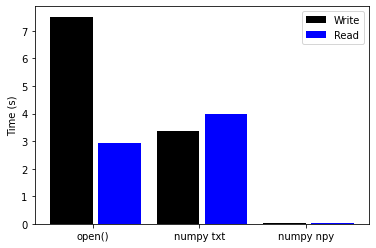

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

X = np.arange(3)
ax.bar(X + 0.00, [total_save_time_open, total_save_time_savetxt, total_save_time_save], color = 'k', width = 0.4, label="Write")
ax.bar(X + 0.45, [total_read_time_open, total_read_time_loadtxt, total_read_time_load], color = 'b', width = 0.4, label="Read")
ax.set_xticks(X+0.2, ('open()', 'numpy txt', 'numpy npy'))
ax.set_ylabel("Time (s)")
#ax.set_xlabel("Method")
plt.legend()
plt.show()

---
<a id='4'></a>

## $(4.)$ Additional File types

Since Python is open source, there are plenty of libraries for almost anything you can imagine. This means that you can find libraries for not only manipulating raw text files like we have, but also to automatically generate `excel` files with the data you have processed, `csv` files etc.

Not only that, but you can dump any kind of Python variable or object to a permanent file. Check the `pickle` or `dill`libraries for this. For dictionaries in particular, you can also use the `json` library (which is a standard file extension as well). We will learn how to use the `json` library to input and output data in the exercises.

Also, we have not talked about it, but there are ways to not only dump the raw data to a file, but to dump it in a compressed manner! Such that the generated files occupy much less space. For numpy arrays for example, we have the `h5py` library that allows generating massive `.h5` dataset files in a compressed manner, with easy access to different numpy arrays just using a tag for them and without the need to import the whole dataset to RAM in order to use its parts! Yeah, miracles exist.





Before we finish, remove all the stuff we have created! Specially the last arrays.

In [ ]:
os.remove("data.txt")
os.remove("data.npy")
os.remove("data_example.txt")
os.remove("data_example2.txt")
os.remove("data_example3.txt")
os.remove("data_example4.txt")
os.remove("data_np.txt")
os.remove("File2.txt")
os.remove("New.txt")
os.remove("New2.txt")
os.remove("npyfile.npy")
os.remove("npzfile.npz")
os.remove("MyDictionary.json")

-------------------------------------
---
<a id='5'></a>

# Further Topics Not Covered in the Course!

Color in, color out...the course has arrived to its end!

But don't be sad! There are way more things to know about python that we didn't have time to cover here!

Here you have a list of the possible following topics you could attack to deepen your programming skills:


- Using `.py` scripts to code instead of a Jupyter Notebook, running scripts from a terminal/console.


- Data manipulation libraries like `pandas`.


- Object Oriented Programming: the `class` conondrum.


- `map` and `lambda` functions.


- Manipulating images, videos, sound and other more exotic data types (libraries like `openCV, sounddevice` ...)


- Machine Learning and Deep Learning (libraries like `pytorch, scikit-learn, tensorflow` ...)


- Parallel processing using several CPU cores or using the GPU itself (`mpi4py, multiprocessing, pytorch` ...)


- Calling C/C++ functions under the hood (`ctypes` ...)


- Graphical user interfaces (`pyQt` ...)


- Standalone executables (`pyinstaller` ...)


- Web/mobile application development (`flask` ...)


- ...

Now that you have the basic notions for Python programming, you could follow almost any online course to continue exploring everything Python has to offer! You can look for free courses in pages like EdX, Coursera or even Youtube itself!

What is more, once you have integrated the concepts you have learnt here, you could even try to give a chance to other lower level programming languages as well! They are more complicated to program (you must have into account more things), but the essentials are the same.

And if not, note that unless you need some very very fast and optimized code you can manage with python. In fact, remember that most of the important libraries (numpy, pytorch, mpi4py etc.) in reality execute C or Fortran code under the hood, so the speed up is already available with Python, without requiring you to go down to the kitchen of hell!


It has been a pleasure to have you here!

For anything you need, you have our emails at the beginning of the notebooks,


**LLA & SCN$^\textbf{2}$** 